# Plotting functions, For Loops, and Numerical Integration

This notebook is meant to provide tools and discussion to explore typical simple methods for integrating functions that may or may not respond to techniques from calculus. For those who have not started calculus not to worry---an integral is simply the process of finding the area under a curve. Anytime you plot a curve/line of any kind it is often the case that the area between an axis and the curve/line is important for engineering or physics.

The basic structure of this notebook begins with calculating the value of some mathematical expression (often called the value of the function) so that we can plot it. We will consider a specific quadratic expression but we will also generalize it for a variety of reasons.

In the second notebook (NumericalIntegrationII.ipynb) we will explore a basic technique for determining the area 'under the curve'. There are many different techniques for accomplishing this task but for this set of notebooks we will keep it simple. 

We will also explore how to check that our code is giving reasonable results which is important in all engineering and science disciplines.


## Dependencies

As you have been learning this is where we load in the various libraries of python tools that are needed for the particular work we are undertaking.  

Just as a reminder, when we import a library we can give a useful shorter name to reduce our effort as we type commands in multiple times. The library ```matplotlib``` is very often renamed as ```mplot``` by python users. I have followed that convention here. Similarly ```numpy``` is renamed as ```np```.

Within the library ```matplotlib``` there are a range of tools. ```matplotlib.pyplot``` is a particular set python plotting tools. Typing out ```matplotlib.pyplot``` every time I want to use this tool will get aggravating. For this reason I have named this set of plotting tools ```plt```. 

You can give libraries and tools what ever names you want. The ones used here are very commonly used by the python community but it is not required.
 
The following code cell will need to be run first before any other code cells.

In [3]:
import numpy as np
import matplotlib as mplot
import matplotlib.pyplot as plt
#from numpy.polynomial import polynomial as ply

### Plotting a Mathematical Expression (function)

Before we dive into how to do this with Jupyter notebooks and python lets think about how we do this when we plot some expression by hand. Lets take an expression which is complex enough that it isn't easy to know what it should look like.

$$y = 4.2 - 2x + 1.5 x^2$$

Lets imagine we want to plot this expression over the range from $x= -5$ to $x=+5$. A direct approach would be to put in many values of x between -5 and 5 and calculate the value of y for each of those x values. I'm sure this would get old fast if you were to do this by hand, but it's exactly what your calculator (or Desmos) does for you. 

#### Why write code when my calculator does much the same thing?

For many basic applications, such as plotting $f(x)=\sin(x)$, writing code is indeed complete overkill. Many realistic engineering and science problems, however, are often poorly defined or understood. Standard calculators and software packages may make many assumptions and choices that may not be appropriate for the poorly defined functions. When we write our own code for a process we can explore variations and options with more clarity and control.

### Creating the x,y pairs: The X values

It's helpful to think about how you would do this by hand. First we need a list of x values that we will plug into our expression to determine the y values.

```numpy.linspace()``` is a tool for doing this and because we did ```import numpy as np``` it shows in the code as ```np.linspace()```. In general python commands are well documented which is not the same as saying the documentation is easy to read. If you wish to get the most out of these learning exercises make a practice of at least looking at the documentation for a moment.

[numpy.linspace documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) 

Many python tools have 'arguments'. These tell the command what you want to do. Be aware that some arguments are required, some are optional (you don't need to specify them), and others have default values if you leave them out. Arguments are in a specific order that can't be changed.  For ```np.linspace``` stop and start are required arguments and num has a default value of 50 if you don't provide another value. All other arguments are optional and we don't need them.

```np.linspace(start,stop,num)``` 

* start: The begining of the range of values you would like to generate (float)
* stop: The end of the range of values you would like to generate (float)
* num: The number of equally spaced values you would like to generate between start and stop (integer)

In the code below it looks like this...  

```xvalues = np.linspace(xmin,xmax,numpoints)``` 

```xvalues``` is a reasonable name for the list of values we are generating. Choosing understandable names for objects and variables is part of good coding practice. We are choosing $xmin = -5.$ and $xmax = 5.$ with 20 equally spaced data points. 

#### Coding Practices: Explorations

When you are learning to code it is helpful to check each step of your process to be sure you understand what it did. This is one of the ways in which Juypyter notebooks are useful. The second half of the cell below is a set of print statements that show me what I've just generated. The very first time you use a python command it is wise to spend a little time exploring how the command works. Here are some things to try. After each individual change rerun the cell. Return the code to it's original state before moving on to the next exploration.

##### Number of data points:

Change numpoints to 21 and see what happens to the xvalues you generate. 

Change numpoints to 20. (notice the decimal point). 

$\huge \text{Question:}$ Why does python complain (redness everywhere)?

##### min and max values:

Change xmin to -5 (no decimal point). 

$\huge \text{Question:}$ Why doesn't python complain about this given what it did with numpoints above?

Change xmin to 5. 

Change xmax to -15. Are you surprised?


In [61]:
# generate 'x' values for the mathematical expression
xmin = -5.
xmax = 5.
numpoints = 20
xvalues = np.linspace(xmin,xmax,numpoints)

# checking that this worked the way I expected.
# I will comment (#) these lines out once I'm sure everything is working correctly.
print("This is the whole list of xvalues.",xvalues)
print("These are some specific xvalues",xvalues[0], xvalues[6])


This is the whole list of xvalues. [-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]
These are some specific xvalues -5.0 -1.8421052631578947


#### Play with the code some more!

$\huge \text{Question:}$ In the code above, change the number in ```xvalues[6]``` to something else. What is the [] doing?


### Creating the x,y pairs: The Y values

The y values for our plot are what we get when we plug each of the x values we have generated into the mathematical expression we are interested in. We have had some earlier practice using python to calculate mathematical expressions. We do the same here and add the ability to easily modify our mathematical expression for reasons that will become apparent.

Let's work with the following expression:

$$y = 2 - 1.2x + 0.8 x^2$$

The expression above is a special case of the generalized quadratic

$$y = a + bx + cx^2\,,$$

where a, b, and c are parameters that we can vary. 

To create a list of yvalues, we can write ```yvalues = coeffa + coeffb*xvalues + coeffc* xvalues**2```, as we did last week.

What do you think should happen if we set coeffb = 0. and coeffc = 0.? Make the change and run the cell. Do the outputs make sense?

What if coeffa - 0., coeffb = 1., and coeffc = 0.?

Are you reassured that the calculation of the yvalues seems to be working correctly?


In [62]:
# The coefficients, these will be adjusted for different purposes
coeffa = 2
coeffb = -1.2
coeffc = .8

# calculate the yvalues from the x values
yvalues = coeffa + coeffb*xvalues + coeffc* xvalues**2 

# quick check that our objects make sense
print("xvalues: ", xvalues)
print("yvalues: ", yvalues)

xvalues:  [-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]
yvalues:  [28.         23.37950139 19.20221607 15.46814404 12.17728532  9.32963989
  6.92520776  4.96398892  3.44598338  2.37119114  1.73961219  1.55124654
  1.80609418  2.50415512  3.64542936  5.2299169   7.25761773  9.72853186
 12.64265928 16.        ]


### Plotting

In previous notebooks we have plotted data which is usually done with a scatter plot using ```ax1.scatter()``` as the plotting command. In this case we're plotting what we hope are smooth and continuous functions. That's why the command is ```ax1.plot()``` instead.

If you look closely at the plot you can see where it's connecting the 20 individual data points in the xvalues and yvalues lists. You can easily go back to the begining of this notebook and increase the number of points by setting numpoints to a larger value (say 200). 

#### Colors

Just in case you want to explore your color choices you can refer to the link below. 

[Matplotlib color choices](https://matplotlib.org/stable/gallery/color/named_colors.html)

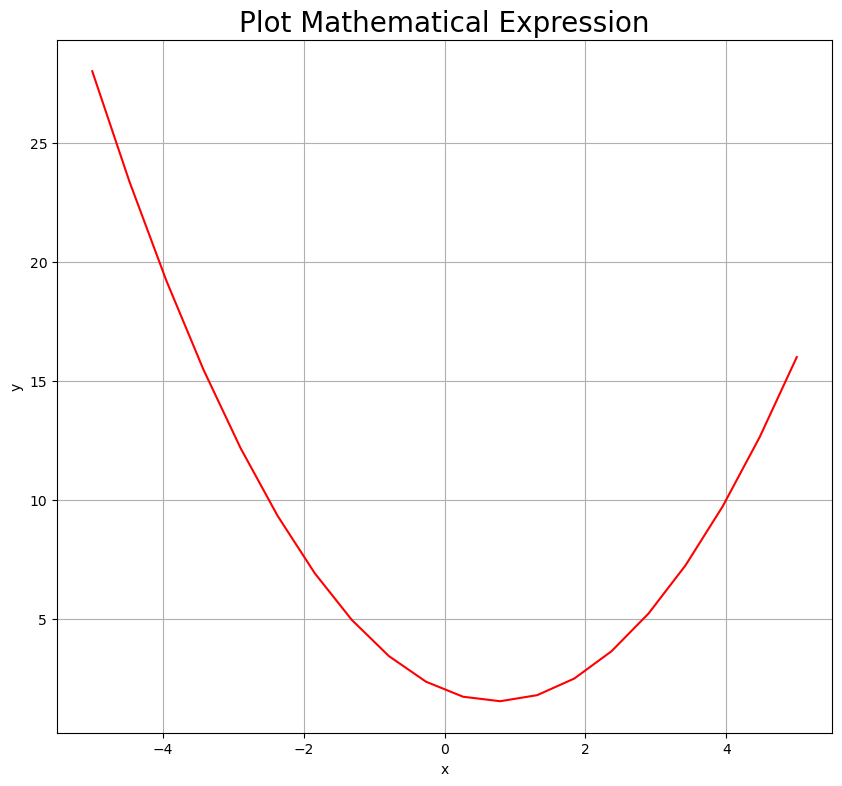

In [63]:
fig1, ax1 = plt.subplots()
ax1.plot(xvalues, yvalues, color='red')

# managing the labels on the plot and it's axes
plt.xlabel('x', fontsize = 10)
plt.ylabel('y', fontsize = 10)
plt.title('Plot Mathematical Expression', fontsize = 20)

fig1.set_size_inches(10, 9)
ax1.grid()

# If you uncomment the .savefigcommand below this will save a copy of the plot as a .png in this directory
# To avoid confusion I usually save all my plots in a 'plots' folder which has to be created before you 
# can save the plot

#fig1.savefig("plots/myplot.png")

plt.show()

## For Loops

This is a useful place to introduce ['for' loops](https://wiki.python.org/moin/ForLoop). This linked page from the python wiki covers a lot of options. 

A for loop is essentially a way to have Python (or any programming language) do something iteratively. During each loop, Python will complete a series of commands and then increment the for loop counter by 1. As an example, I can have Python print ```cheeseburger``` a number of times.

In [29]:
for i in range(0,5):
    print("cheeseburger")

cheeseburger
cheeseburger
cheeseburger
cheeseburger
cheeseburger


But I can also have Python perform more complicated tasks during the loop. For instance, I can use ```i``` in the commands within my loop. A strangtforward example:

In [30]:
for i in range(0,5):
    print(i**2)

0
1
4
9
16


And now a less straightforward example:

In [36]:
v=0
for i in range(0,5):
    v=v+i #set new v equal to old v plus the current value of i
    print("After iterating the loop", i+1,"times, we get:", v) #print v before running the loop again

After iterating the loop 1 times, we get: 0
After iterating the loop 2 times, we get: 1
After iterating the loop 3 times, we get: 3
After iterating the loop 4 times, we get: 6
After iterating the loop 5 times, we get: 10


Note that in each iteration of the loop, ```v=v+i``` tells Python to set the new value of ```v``` to be equal to the previous value of ```v``` plus some extra amount (given by the current value of ```i```).

Suppose that we have a simple list, call it ```u```, with only the number 0 in it. 

Now lets suppose that we would like to add more values to the list in a systematic way. We can use a loop for this. Let's suppose that we would like to add values to the list which represent the squares of all of the intergers between 1 and 10 (inclusive). The code that does this is:

In [38]:
u=[0] #u is a list with just one item in it.
for i in range(1,10):
    u=u+[i**2] #[] means that we're adding a list to u. The list contains only 1 item. This item is the number given by the current value of i, squared.
    print("After iterating the loop", i,"times, we get:",u) #print u before running through the loop again to see what the code is doing 
print("The final result is:", u) #printing u at the end to see our final result

After iterating the loop 1 times, we get: [0, 1]
After iterating the loop 2 times, we get: [0, 1, 4]
After iterating the loop 3 times, we get: [0, 1, 4, 9]
After iterating the loop 4 times, we get: [0, 1, 4, 9, 16]
After iterating the loop 5 times, we get: [0, 1, 4, 9, 16, 25]
After iterating the loop 6 times, we get: [0, 1, 4, 9, 16, 25, 36]
After iterating the loop 7 times, we get: [0, 1, 4, 9, 16, 25, 36, 49]
After iterating the loop 8 times, we get: [0, 1, 4, 9, 16, 25, 36, 49, 64]
After iterating the loop 9 times, we get: [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
The final result is: [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


One final example. What does the following code do?

In [45]:
w=[0] #w is a list with just one item in it.
for i in range(1,10):
    w=w+[w[0]]
    print(w)

[0, 0]
[0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Task for Assignment 8

This is a good point to try one of the day's main tasks. I would like for you to create a loop which prints the [Fibonacci sequence](https://en.wikipedia.org/wiki/Fibonacci_sequence) up to 40 digits. Explain how you did it in detail.  

## Numerical Integration

As mentioned at the top of this document, it is often important in physics and engineering to find the area between a function and the x-axis. This procedure of finding the area is known as "taking the integral" of the function. If the function has a name $f(x)$, then the integral (area) under the curve between $x=0$ and $x=5$ is notated as: $$\int_0^5 f(x) dx$$.

The following code plots a quadratic function on the range from $x=0$ to $x=5$. The code also plots a blue line where the x-axis is, so that it is more clear what the area we're finding is.

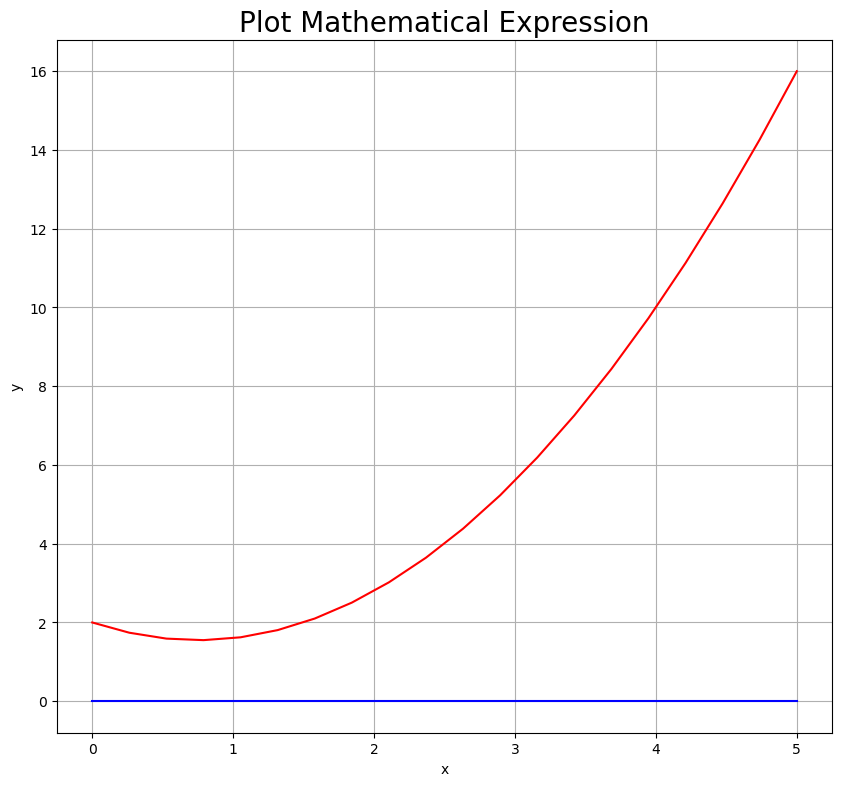

In [47]:
# generate 'x' values for the mathematical expression
xmin = 0.
xmax = 5.
numpoints = 20
xvalues = np.linspace(xmin,xmax,numpoints)

# The coefficients, these will be adjusted for different purposes
coeffa = 2
coeffb = -1.2
coeffc = .8

# calculate the yvalues from the x values
yvalues = coeffa + coeffb*xvalues + coeffc* xvalues**2 


fig1, ax1 = plt.subplots()
ax1.plot(xvalues, yvalues, color='red')
ax1.plot(xvalues, np.full_like(xvalues,0), color='blue')

# managing the labels on the plot and it's axes
plt.xlabel('x', fontsize = 10)
plt.ylabel('y', fontsize = 10)
plt.title('Plot Mathematical Expression', fontsize = 20)

fig1.set_size_inches(10, 9)
ax1.grid()

# If you uncomment the .savefigcommand below this will save a copy of the plot as a .png in this directory
# To avoid confusion I usually save all my plots in a 'plots' folder which has to be created before you 
# can save the plot

#fig1.savefig("plots/myplot1.png")

plt.show()

Let's plot the line again, but this time let's render less points. In fact, let's use the minimum amount of points, which is 2. We obtain:

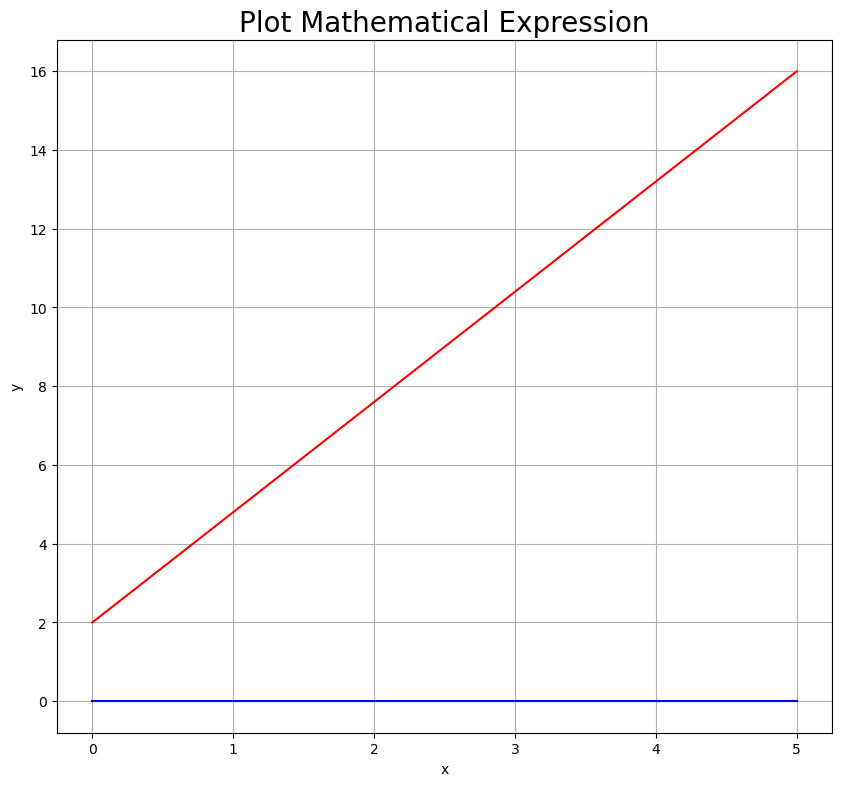

In [48]:
# generate 'x' values for the mathematical expression
xmin = 0.
xmax = 5.
numpoints = 2
xvalues = np.linspace(xmin,xmax,numpoints)

# The coefficients, these will be adjusted for different purposes
coeffa = 2
coeffb = -1.2
coeffc = .8

# calculate the yvalues from the x values
yvalues = coeffa + coeffb*xvalues + coeffc* xvalues**2 


fig1, ax1 = plt.subplots()
ax1.plot(xvalues, yvalues, color='red')
ax1.plot(xvalues, np.full_like(xvalues,0), color='blue')

# managing the labels on the plot and it's axes
plt.xlabel('x', fontsize = 10)
plt.ylabel('y', fontsize = 10)
plt.title('Plot Mathematical Expression', fontsize = 20)

fig1.set_size_inches(10, 9)
ax1.grid()

# If you uncomment the .savefigcommand below this will save a copy of the plot as a .png in this directory
# To avoid confusion I usually save all my plots in a 'plots' folder which has to be created before you 
# can save the plot

#fig1.savefig("plots/myplot1.png")

plt.show()

Notice that in this vetry-rough approximate graph, the area between the red and the blue curves forms a trapezoid.

And it turns out that we can calculate the area formed by a trapezoid quite easily. It is
$$A=\frac{h\left(b_1+b_2\right)}{2}\,,$$
where $h$ is the height of the trapezoid (in this case, $h=5$), and $b_1$ and $b_2$ are the lengths of the top and bottom sides (in this case, $2$ and $16$). 

We can have Python quite eaily find this area for us:

In [51]:
h = xmax - xmin
b1 = yvalues[0]
b2 = yvalues[numpoints-1]
A = h*(b1+b2)/2
print("The area between the curves is:",A)

The area between the curves is: 45.0


Of course 45 isn't the area under the full function, but rather just the area under the straight-line function yielded by only plotting 2 points and connecting them.

We can get a better approximation for the area if wee increase the number of points and try again. Let's try 3 points. The code for this is:

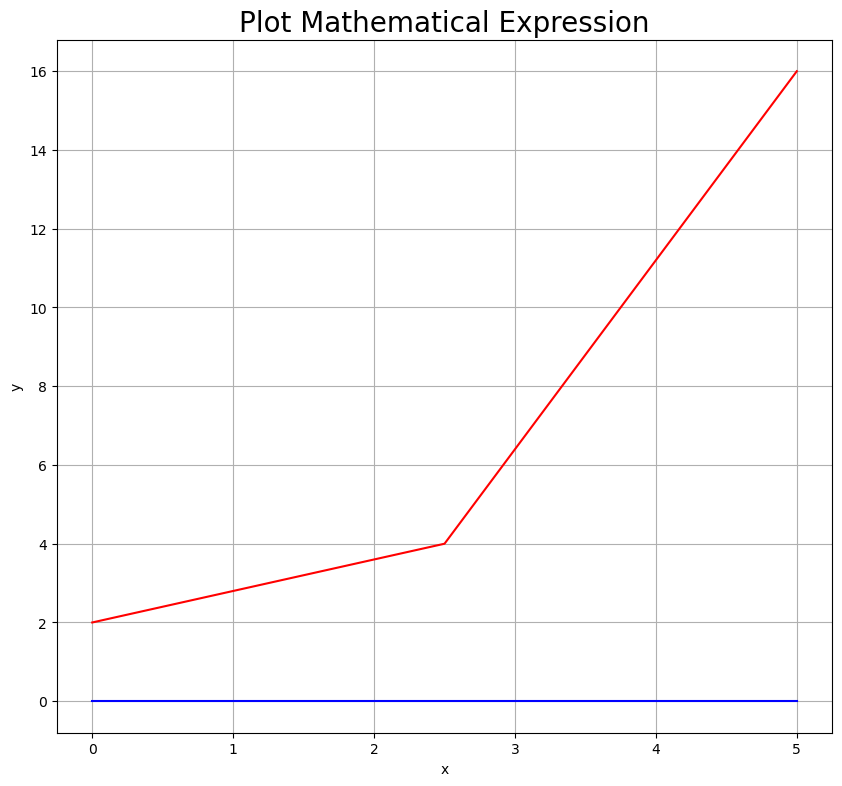

In [70]:
# generate 'x' values for the mathematical expression
xmin = 0.
xmax = 5.
numpoints = 3
xvalues = np.linspace(xmin,xmax,numpoints)

# The coefficients, these will be adjusted for different purposes
coeffa = 2
coeffb = -1.2
coeffc = .8

# calculate the yvalues from the x values
yvalues = coeffa + coeffb*xvalues + coeffc* xvalues**2 

fig1, ax1 = plt.subplots()
ax1.plot(xvalues, yvalues, color='red')
ax1.plot(xvalues, np.full_like(xvalues,0), color='blue')

# managing the labels on the plot and it's axes
plt.xlabel('x', fontsize = 10)
plt.ylabel('y', fontsize = 10)
plt.title('Plot Mathematical Expression', fontsize = 20)

fig1.set_size_inches(10, 9)
ax1.grid()

# If you uncomment the .savefigcommand below this will save a copy of the plot as a .png in this directory
# To avoid confusion I usually save all my plots in a 'plots' folder which has to be created before you 
# can save the plot

#fig1.savefig("plots/myplot1.png")

plt.show()

We can approximate the area under the red function above as the combined areas of 2 trapezoids, each with a height of 2.5.

In [54]:
h = (xmax - xmin)/2
b1 = yvalues[numpoints-3]
b2 = yvalues[numpoints-2]
b3 = yvalues[numpoints-1]
A12 = h*(b1+b2)/2
A23 = h*(b2+b3)/2
print("The area of trapezoid 1 is:", A12)
print("The area of trapezoid 2 is:", A23)
A = A12 + A23 #Total Area
print("The area between the curves is:",A)

The area of trapezoid 1 is: 7.5
The area of trapezoid 2 is: 25.0
The area between the curves is: 32.5


One could keep repeating this process for a greater number of points. First ```numpoints=4```, then ```numpoints=5``` and so on. When ```numpoints=4```, for instance, we will have the areas of 3 trapezoids to add up. When ```numpoints=5``` we will have the areas of 4 trapezoids to add up. 

### Task for Assignment 8

This is a good point to try one of the day's main tasks. I would like for you to use Python to calculate the area under the plot of $y = 2 - 1.2x + 0.8 x^2$ generated when ```numpoints=4```.

## Loops and Numerical Integration

As we add more and more partial areas to find the total area, this process gets tedious. This is the perfect opportunity to save ourselves some work and just write a loop to have Python do it for us.

### Task for Assignment 8

This is a good point to try one of the day's main tasks. I would like for you to write a loop that has Python calculate the area (of $y = 2 - 1.2x + 0.8 x^2$) for an arbitrary number of points (```numpoints``` is arbitrary).

### Trapezoid rule and other details

This process of having our computers calculate integrals by approximating functions as trapezoids (or other shapes) is known as *numerical integration*. Because we are approximating the shape with trapezoids, the method we have developed is called the *trapezoid rule*. Details on the trapezoid rule from an [open source text](https://math.libretexts.org/Courses/Mount_Royal_University/MATH_2200%3A_Calculus_for_Scientists_II/2%3A_Techniques_of_Integration/2.5%3A_Numerical_Integration_-_Midpoint%2C_Trapezoid%2C_Simpson's_rule).



## How close is our numerical integration to the correct answer?

When we used ```numpoints=2```, we found that the area was $45$. When we used ```numpoints=3```, we found that the area was $32.5$. At this point, you should now have a "for loop" that tells you the area for any value of ```numpoints```. 

The general idea behind the trapezoid rule (or any form of numerical integration) is that as we increase ```numpoints```, the area that we calculate should more closely approximate the true area underneath the exact function. If we plot the value of the area (vertical axis) as a function of ```numpoints``` (horizontal axis), we should be able to see how the area that we calculate approaches a certain "asymptotic value" ---which we assume is the true value of the integral to perfect precision.

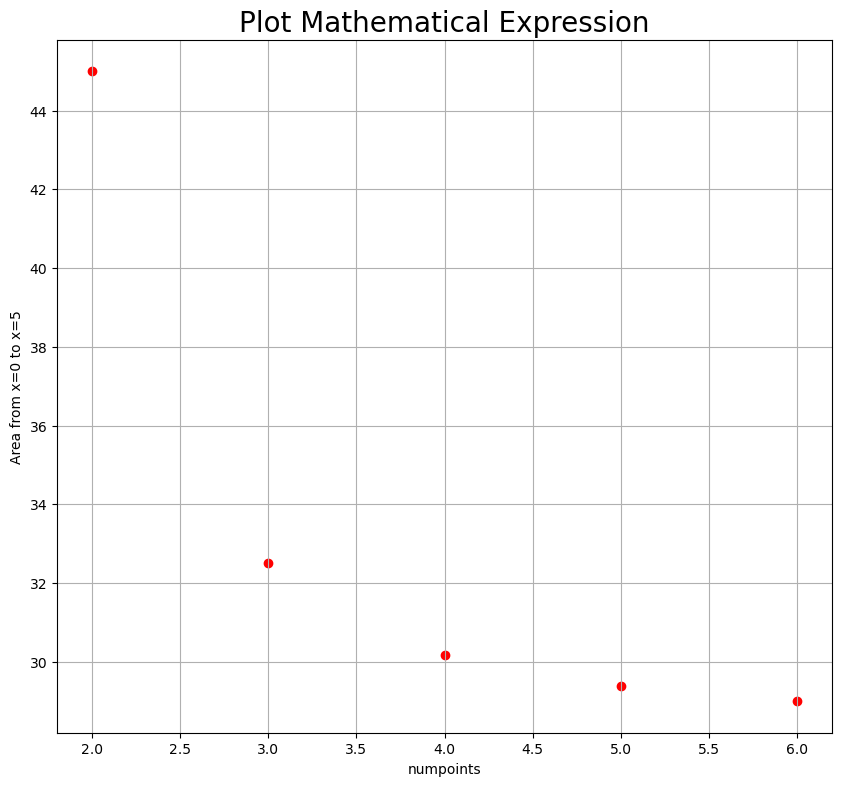

In [59]:
fig1, ax1 = plt.subplots()
ax1.scatter([2,3,4,5,6], [45,32.5,30.185 ,29.375,29], color='red') #first list is the number of points. second list is the area for the corresponding number of points.

# managing the labels on the plot and it's axes
plt.xlabel('numpoints', fontsize = 10)
plt.ylabel('Area from x=0 to x=5', fontsize = 10)
plt.title('Plot Mathematical Expression', fontsize = 20)

fig1.set_size_inches(10, 9)
ax1.grid()

# If you uncomment the .savefigcommand below this will save a copy of the plot as a .png in this directory
# To avoid confusion I usually save all my plots in a 'plots' folder which has to be created before you 
# can save the plot

#fig1.savefig("plots/myplot1.png")

plt.show()

Notice how the dots above approach a certain value of the area (around 28 or 29 or so). In the limit of $\text{numpoints}\longrightarrow\infty$, we say that 
$$\lim_{\text{numpoints}\longrightarrow\infty}Area(\text{numpoints})=\int_0^5  (2 - 1.2x + 0.8 x^2) dx \approx 28\text{ish}\,.$$

### Task for Assignment 8

This is a good point to try one of the day's main tasks. I would like for you to generate a version of the above plot which shows the area under the curve of $y = 2 - 1.2x + 0.8 x^2$ as a function of the number of points used in the calculation (```numpoints```). Plot all the way up to ```numpoints=100```. I recommend that you use a loop to do this. 

### Task for Assignment 8

Let ```numpoints``` get to be very large. What would you say is the "true" area of the integral $\int_0^5  (2 - 1.2x + 0.8 x^2) dx $? 